<a href="https://colab.research.google.com/github/PAVANGUBBALA/Linear_Regression-Project/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pd.read_csv("/content/scaler_clustering.csv")

In [3]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,FullStack Engineer,2019.0


In [4]:
df.shape

(35394, 7)

In [5]:
df.job_position.value_counts()

job_position
Backend Engineer              6100
Other                         4749
FullStack Engineer            4599
Frontend Engineer             1700
Support Engineer              1302
                              ... 
User Experience Specialist       1
Driver                           1
Reseller                         1
Technical Leader                 1
Senior data engineer             1
Name: count, Length: 273, dtype: int64

In [6]:
df.job_position.nunique( )

273

In [7]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0','email_hash'],axis=1,inplace=True)

In [9]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000.0,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000.0,Backend Engineer,2020.0
3,ngpgutaxv,2017.0,700000.0,Backend Engineer,2019.0
4,qxen sqghu,2017.0,1400000.0,FullStack Engineer,2019.0


In [10]:
df[df["job_position"].apply(lambda x : "&" in str(x))]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
27272,ctaxw cxrrvst ouv qtogqn,2019.0,1800000.0,F&b service,2021.0
34995,vwwtznhqt,2017.0,440000.0,Software Prod & Plat Eng Analyst,2021.0
35033,wgszxkvzn,2017.0,600000.0,Developer & Production Support,2021.0


In [11]:
#From This We can Conclude That There Were Special Charecter's present In Job Position

In [12]:
def remove_special_chars(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

In [13]:
df["job_position"]=df["job_position"].apply(lambda x : remove_special_chars(str(x)))

In [14]:
df[df["job_position"].apply(lambda x : "&" in str(x))]

,company_hash,orgyear,ctc,job_position,ctc_updated_year


In [15]:
#Special Charecter's In Job_Position Column was Removed

In [16]:
df["job_position"].nunique()

248

In [17]:
#From 1017 Job_positions Reduced To 857 Unique Job_positions By Removing The Special Charecter's

In [18]:
df.shape

(35394, 5)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(33269, 5)

In [21]:
#There are 17596 Duplicate rows

In [22]:
df["company_hash"].nunique()

9821

In [23]:
df["company_hash"]=df["company_hash"].apply(lambda x : remove_special_chars(str(x)))

In [24]:
#Removing Special Charecter's From The Company Hash Column

In [25]:
df["company_hash"].nunique()

9805

In [26]:
#There are 91 Company Names With Special Charecter's

In [27]:
#Checking For The Blank Place In The company_hash or job_position columns

In [28]:
df[((df['company_hash']=='') | (df['job_position']==''))]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
2208,,2017.0,100000.0,nan,2020.0
2940,,2020.0,100000.0,nan,2020.0
4151,,2020.0,350000.0,nan,2021.0
4162,,2013.0,900000.0,fullstack engineer,2021.0
4250,,2015.0,700000.0,nan,2020.0
5543,,2020.0,350000.0,other,2021.0
5796,seo gxr svo axcxoxgz,2011.0,700000.0,,2021.0
7050,,2019.0,300000.0,other,2020.0
11032,,2018.0,840000.0,fullstack engineer,2019.0
11227,,2015.0,1100000.0,nan,2020.0


In [29]:
#There Were 94 Rows

In [30]:
#Excluding Those Row's Having Blank Place In The company_hash or job_position columns

In [31]:
df=df[~((df['company_hash']=='') | (df['job_position']==''))]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33248 entries, 0 to 35393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_hash      33248 non-null  object 
 1   orgyear           33221 non-null  float64
 2   ctc               33247 non-null  float64
 3   job_position      33248 non-null  object 
 4   ctc_updated_year  33247 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [33]:
#There Were 86 Null values In The orgyear Column

In [34]:
df["orgyear"].fillna(df.groupby("company_hash")["orgyear"].transform("median"),inplace=True)

In [35]:
#Imputed The orgyear with Company median orgyear

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33248 entries, 0 to 35393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_hash      33248 non-null  object 
 1   orgyear           33240 non-null  float64
 2   ctc               33247 non-null  float64
 3   job_position      33248 non-null  object 
 4   ctc_updated_year  33247 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [37]:
#Checking For  Null Values In The Data

In [38]:
df.isna().sum()

company_hash        0
orgyear             8
ctc                 1
job_position        0
ctc_updated_year    1
dtype: int64

In [39]:
#Dropping The Null Values In The Data

In [40]:
df.dropna(inplace=True)

In [41]:
#Checking For Null Values In The Data

In [42]:
df.isna().sum()

company_hash        0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [43]:
#There Are No Null values In The Data

In [44]:
df.orgyear.value_counts()

orgyear
2018.0    4739
2017.0    4569
2016.0    4438
2019.0    4241
2015.0    3424
2014.0    2583
2020.0    2574
2013.0    1658
2012.0    1115
2011.0     802
2021.0     605
2010.0     543
2009.0     372
2008.0     253
2007.0     219
2022.0     197
2005.0     177
2006.0     167
2004.0     118
2003.0      95
2001.0      67
2002.0      64
2023.0      52
2000.0      26
1998.0      17
1997.0      17
1999.0      17
1995.0      11
1996.0      10
2024.0       9
1991.0       8
1992.0       6
1990.0       6
2026.0       5
1993.0       5
0.0          4
1994.0       3
1982.0       2
2025.0       2
2029.0       2
1985.0       2
1970.0       1
2101.0       1
209.0        1
2018.5       1
1972.0       1
206.0        1
1988.0       1
208.0        1
2015.5       1
2017.5       1
1981.0       1
1973.0       1
2031.0       1
2106.0       1
2107.0       1
Name: count, dtype: int64

In [45]:
lower_year=df.orgyear.quantile(0.01)

In [46]:
upper_year=df.orgyear.quantile(0.99)

In [47]:
lower_ctc=df.ctc.quantile(0.01)

In [48]:
upper_ctc=df.ctc.quantile(0.99)

In [49]:
#Clipping The values In Year & Ctc To Prevent Outlier's

In [50]:
df["orgyear"]=df["orgyear"].clip(lower=lower_year,upper=upper_year)
df["ctc"]=df["ctc"].clip(lower=lower_ctc,upper=upper_ctc)

In [51]:
df.loc[df['job_position']=='nan']

,company_hash,orgyear,ctc,job_position,ctc_updated_year
8,utqoxontzn ojontbo,2020.0,450000.0,nan,2019.0
9,xrbhd,2019.0,360000.0,nan,2019.0
12,mvqwrvjo wgqugqvnt mvzpxzs,2020.0,800000.0,nan,2020.0
17,puxn,2020.0,1400000.0,nan,2019.0
18,mvlvl exzotqc,2018.0,100000.0,nan,2021.0
...,...,...,...,...,...
35378,ovbohzs trtwnqgzxwo,2016.0,2400000.0,nan,2021.0
35384,yxpt btootzstq,2012.0,100000.0,nan,2021.0
35385,atrgxnnt,2018.0,800000.0,nan,2021.0
35390,gqvwrt,2017.0,1200000.0,nan,2021.0


In [52]:
#We see some 'nan's in job_position

In [53]:
#Replacing The String nan With Actual Nan values

In [54]:
df['job_position'] = df['job_position'].replace('nan', np.nan)

In [55]:
df.isna().sum()

company_hash           0
orgyear                0
ctc                    0
job_position        9183
ctc_updated_year       0
dtype: int64

In [56]:
#Masking companies by renaming it to "Others" having count less than 5

In [57]:
company_counts = df['company_hash'].value_counts()

# Step 2: Identify companies with counts less than 5
companies_to_mask = company_counts[company_counts < 5].index

# Step 3: Replace the names of these companies with "Others"
df.loc[df['company_hash'].isin(companies_to_mask), 'company_hash'] = 'Others'


In [58]:
df['company_hash'].value_counts().sort_values(ascending=False)

company_hash
Others                       12724
nvnv wgzohrnvzwj otqcxwto     1295
xzegojo                        860
wgszxkvzn                      702
vwwtznhqt                      635
                             ...  
lgwvnv                           5
ke xzaxv ucn rna                 5
obvrrwvot                        5
sqtjgqvzst unt rna               5
veexzxnj srgmvr xzw              5
Name: count, Length: 894, dtype: int64

In [59]:
#We got More Number In other's Category

In [60]:
df['experience']=2022-df['orgyear']

(array([3450., 8982., 9007., 6008., 1658., 1917.,  915.,  472.,  344.,
         486.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <BarContainer object of 10 artists>)

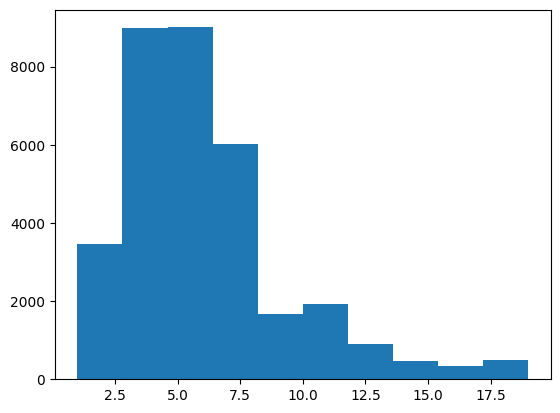

In [61]:
plt.hist(df['experience'])

In [62]:
df['experience'].describe()

count    33239.000000
mean         6.007777
std          3.382832
min          1.000000
25%          4.000000
50%          5.000000
75%          8.000000
max         19.000000
Name: experience, dtype: float64

In [63]:
df.shape

(33239, 6)

In [64]:
#Dropping The Duplicate Row's

In [65]:
df.drop_duplicates(inplace=True)
df.shape

(28257, 6)

In [66]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience
0,Others,2016.0,1100000.0,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0


In [67]:
df['ctc_updated_year'] = df[['ctc_updated_year', 'orgyear']].max(axis=1)

In [68]:
df.isna().sum()

company_hash           0
orgyear                0
ctc                    0
job_position        7043
ctc_updated_year       0
experience             0
dtype: int64

In [69]:
#Filling null values with others

In [70]:
df['job_position'] = df['job_position'].fillna('Others')

In [71]:
df.isna().sum()

company_hash        0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
experience          0
dtype: int64

In [72]:
#There Are No Null Values In The Data

In [73]:
df.drop_duplicates(inplace=True)
df.shape

(28153, 6)

In [74]:
df.describe()

,orgyear,ctc,ctc_updated_year,experience
count,28153.000000,2.815300e+04,28153.000000,28153.000000
mean,2015.850762,3.214091e+06,2020.323873,6.149238
std,3.495942,1.347678e+07,0.663058,3.495942
min,2003.000000,1.000000e+05,2015.000000,1.000000
25%,2014.000000,5.000000e+05,2020.000000,4.000000
50%,2016.000000,8.119990e+05,2020.000000,6.000000
75%,2018.000000,1.500000e+06,2021.000000,8.000000
max,2021.000000,1.005124e+08,2021.000000,19.000000


In [75]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience
0,Others,2016.0,1100000.0,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0


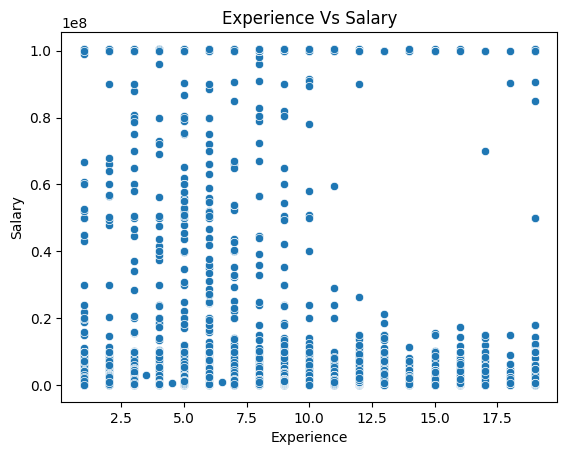

In [76]:
sns.scatterplot(x="experience",y="ctc",data=df)
plt.title("Experience Vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [77]:
#Clustering Based On Company Job Position & Year's Of Experience

In [78]:
grouped_c_j_y = df.groupby(['experience','job_position','company_hash'])['ctc'].describe()


In [79]:
df_cjy=df.merge(grouped_c_j_y, on=['experience','job_position','company_hash'], how='left')
df_cjy

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,149.0,5.355251e+06,1.716693e+07,100000.0,400000.0,650000.0,1070000.0,100512400.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,5.0,7.239998e+05,1.959085e+05,449999.0,620000.0,750000.0,850000.0,950000.0
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,113.0,2.136575e+06,9.406003e+06,100000.0,600000.0,1000000.0,1560000.0,100420000.0
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2.0,9.500000e+05,3.535534e+05,700000.0,825000.0,950000.0,1075000.0,1200000.0
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,156.0,2.204506e+06,8.186632e+06,100000.0,480000.0,800000.0,1312500.0,80000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28148,wxowg,2017.0,1000000.0,fullstack engineer,2021.0,5.0,1.0,1.000000e+06,NaN,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0
28149,utqoxontzn ojontbo,2020.0,940000.0,backend engineer,2020.0,2.0,4.0,6.175000e+05,2.338625e+05,440000.0,447500.0,545000.0,715000.0,940000.0
28150,mn,2018.0,400000.0,support engineer,2021.0,4.0,1.0,4.000000e+05,NaN,400000.0,400000.0,400000.0,400000.0,400000.0
28151,gqvwrt,2017.0,1200000.0,Others,2021.0,5.0,9.0,1.088889e+06,3.515837e+05,500000.0,1000000.0,1200000.0,1400000.0,1500000.0


In [80]:
def segment(ctc, fifty_percent, seventy_five_percent):
    if ctc < fifty_percent:
        return 3
    elif ctc >= fifty_percent and ctc <= seventy_five_percent:
        return 2

    elif ctc >= seventy_five_percent:
        return 1

In [81]:
df_cjy['Designation'] =df_cjy.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cjy.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max,Designation
0,Others,2016.0,1100000.0,other,2020.0,6.0,149.0,5.355251e+06,1.716693e+07,100000.0,400000.0,650000.0,1070000.0,100512400.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,5.0,7.239998e+05,1.959085e+05,449999.0,620000.0,750000.0,850000.0,950000.0,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,113.0,2.136575e+06,9.406003e+06,100000.0,600000.0,1000000.0,1560000.0,100420000.0,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2.0,9.500000e+05,3.535534e+05,700000.0,825000.0,950000.0,1075000.0,1200000.0,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,156.0,2.204506e+06,8.186632e+06,100000.0,480000.0,800000.0,1312500.0,80000000.0,1


In [82]:
df_cjy.Designation.value_counts(normalize=True)

Designation
2    0.490676
3    0.310056
1    0.199268
Name: proportion, dtype: float64

In [83]:
#Clustering Based On Company & Job Position

In [84]:
grouped_C_Jp=df.groupby(['job_position','company_hash'])['ctc'].describe()
grouped_C_Jp.head()

count          mean           std       min  \
job_position company_hash                                                     
Others       Others            1273.0  3.512668e+06  1.365390e+07  100000.0   
             a ntwyzgrgsxto       3.0  7.333333e+05  5.392897e+05  350000.0   
             adw ntwyzgrgsj      18.0  8.551667e+05  6.366285e+05  378000.0   
             adw ntwyzgrgsxto    10.0  5.806000e+05  3.514466e+05  100000.0   
             ahzkg                2.0  9.000000e+05  8.485281e+05  300000.0   

                                    25%       50%        75%          max  
job_position company_hash                                                  
Others       Others            450000.0  800000.0  1650000.0  100512400.0  
             a ntwyzgrgsxto    425000.0  500000.0   925000.0    1350000.0  
             adw ntwyzgrgsj    400000.0  570000.0  1137500.0    2350000.0  
             adw ntwyzgrgsxto  400000.0  485000.0   702000.0    1300000.0  
             ahzkg             600000.0  900000.0  1200000.0    1500000.0

In [85]:
df_cj=df.merge(grouped_C_Jp, on=['job_position','company_hash'], how='left')
df_cj.head(20)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,1114.0,5.531185e+06,1.840580e+07,100000.0,400000.00,700000.0,1200000.0,100512400.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,10.0,7.369999e+05,3.193762e+05,300000.0,502500.00,685000.0,925000.0,1380000.0
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1146.0,3.294577e+06,1.250206e+07,100000.0,585000.00,1000000.0,1800000.0,100512400.0
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,3.0,8.066667e+05,3.523256e+05,520000.0,610000.00,700000.0,950000.0,1200000.0
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,1071.0,2.977847e+06,1.214797e+07,100000.0,500000.00,900000.0,1500000.0,100512400.0
5,Others,2018.0,700000.0,fullstack engineer,2020.0,4.0,1071.0,2.977847e+06,1.214797e+07,100000.0,500000.00,900000.0,1500000.0,100512400.0
6,lubgqsvz wyvot wg,2018.0,1500000.0,fullstack engineer,2019.0,4.0,35.0,4.713069e+06,1.668852e+07,460000.0,1500000.00,1900000.0,2265000.0,100512400.0
7,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,3.0,1.666667e+06,1.625833e+06,400000.0,750000.00,1100000.0,2300000.0,3500000.0
8,utqoxontzn ojontbo,2020.0,450000.0,Others,2020.0,2.0,35.0,9.037143e+05,5.507486e+05,350000.0,480000.00,800000.0,1150000.0,2940000.0
9,Others,2019.0,360000.0,Others,2019.0,3.0,1273.0,3.512668e+06,1.365390e+07,100000.0,450000.00,800000.0,1650000.0,100512400.0


In [86]:
df_cj['classs'] = df_cj.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max,classs
0,Others,2016.0,1100000.0,other,2020.0,6.0,1114.0,5.531185e+06,1.840580e+07,100000.0,400000.0,700000.0,1200000.0,100512400.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,10.0,7.369999e+05,3.193762e+05,300000.0,502500.0,685000.0,925000.0,1380000.0,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1146.0,3.294577e+06,1.250206e+07,100000.0,585000.0,1000000.0,1800000.0,100512400.0,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,3.0,8.066667e+05,3.523256e+05,520000.0,610000.0,700000.0,950000.0,1200000.0,2
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,1071.0,2.977847e+06,1.214797e+07,100000.0,500000.0,900000.0,1500000.0,100512400.0,2


In [87]:
df_cj.classs.value_counts(normalize=True)

classs
3    0.417256
2    0.340319
1    0.242425
Name: proportion, dtype: float64

In [88]:
# Job position that has the highest class ie Class 1

In [89]:
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
Others,1793.0,6.444376e+06,1.880659e+07,240000.0,1250000.00,1850000.0,2900000.0,100512400.0
backend engineer,1290.0,7.615632e+06,2.075955e+07,360000.0,1400000.00,2100000.0,3500000.0,100512400.0
other,936.0,1.662929e+07,3.261063e+07,350000.0,1047500.00,1600000.0,4000000.0,100512400.0
fullstack engineer,916.0,7.016514e+06,2.033496e+07,380000.0,1280000.00,1800000.0,2900000.0,100512400.0
frontend engineer,351.0,7.000157e+06,2.024442e+07,440000.0,1200000.00,1600000.0,2350000.0,100512400.0
support engineer,284.0,1.468933e+07,3.285457e+07,400000.0,900000.00,1150000.0,2000000.0,100512400.0
qa engineer,245.0,1.159399e+07,2.799789e+07,380000.0,1000000.00,1400000.0,2300000.0,100512400.0
data analyst,195.0,1.570224e+07,3.384363e+07,300000.0,1000000.00,1400000.0,2575000.0,100512400.0
engineering leadership,111.0,1.962959e+07,3.460819e+07,480000.0,2725000.00,3950000.0,9150000.0,100512400.0


In [90]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [91]:
df_cj.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,classs
0,Others,2016.0,1100000.0,other,2020.0,6.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,2


In [92]:
df_cjy.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,Designation
0,Others,2016.0,1100000.0,other,2020.0,6.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,1


In [93]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','experience','ctc_updated_year'], how='left')
df_cjy_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,classs,Designation
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,2,1
...,...,...,...,...,...,...,...,...
28148,wxowg,2017.0,1000000.0,fullstack engineer,2021.0,5.0,3,2
28149,utqoxontzn ojontbo,2020.0,940000.0,backend engineer,2020.0,2.0,2,1
28150,mn,2018.0,400000.0,support engineer,2021.0,4.0,3,2
28151,gqvwrt,2017.0,1200000.0,Others,2021.0,5.0,3,2


In [94]:
#Manual Clustering based on comapny

In [95]:
grouped_c = df.groupby(['company_hash'])['ctc'].describe()
df_c = df.merge(grouped_c, on=['company_hash'], how='left')
df_c.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max
0,Others,2016.0,1100000.0,other,2020.0,6.0,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,94.0,3.483217e+06,1.475308e+07,250000.0,450000.0,720000.0,1100000.0,100512400.0
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,14.0,1.218571e+06,7.801564e+05,520000.0,750000.0,1075000.0,1350000.0,3500000.0
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0


In [96]:
# Creating Tier basis on the salary in the companies

In [97]:
df_c['Tier'] =df_c.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_c.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max,Tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,94.0,3.483217e+06,1.475308e+07,250000.0,450000.0,720000.0,1100000.0,100512400.0,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,14.0,1.218571e+06,7.801564e+05,520000.0,750000.0,1075000.0,1350000.0,3500000.0,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0,2


In [98]:
df_c.Tier.value_counts(normalize=True)

Tier
3    0.468369
2    0.296523
1    0.235108
Name: proportion, dtype: float64

In [99]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','experience','ctc_updated_year'], how='left')
df_cjy_cj_c.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,classs,Designation,count,mean,std,min,25%,50%,75%,max,Tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3,94.0,3.483217e+06,1.475308e+07,250000.0,450000.0,720000.0,1100000.0,100512400.0,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2,3,14.0,1.218571e+06,7.801564e+05,520000.0,750000.0,1075000.0,1350000.0,3500000.0,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,2,1,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0,2
5,Others,2018.0,700000.0,fullstack engineer,2020.0,4.0,3,3,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0,3
6,lubgqsvz wyvot wg,2018.0,1500000.0,fullstack engineer,2019.0,4.0,3,2,153.0,5.038936e+06,1.759218e+07,100000.0,1400000.0,1700000.0,2130000.0,100512400.0,3
7,vwwtznhqt ntwyzgrgsj,2019.0,400000.0,backend engineer,2019.0,3.0,3,2,12.0,7.908333e+05,8.823982e+05,300000.0,400000.0,525000.0,672500.0,3500000.0,3
8,utqoxontzn ojontbo,2020.0,450000.0,Others,2020.0,2.0,3,2,92.0,1.192609e+06,1.936246e+06,200000.0,562500.0,900000.0,1300000.0,18670000.0,3
9,Others,2019.0,360000.0,Others,2019.0,3.0,3,3,7675.0,4.083381e+06,1.562364e+07,100000.0,460000.0,800000.0,1500000.0,100512400.0,3


In [100]:
df_cjy_cj_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy_cj_c.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,classs,Designation,Tier
0,Others,2016.0,1100000.0,other,2020.0,6.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999.0,fullstack engineer,2019.0,4.0,3,3,3
2,Others,2015.0,2000000.0,backend engineer,2020.0,7.0,1,1,1
3,ngpgutaxv,2017.0,700000.0,backend engineer,2019.0,5.0,2,3,3
4,Others,2017.0,1400000.0,fullstack engineer,2019.0,5.0,2,1,2


In [102]:
X = df_cjy_cj_c[['ctc', 'experience', 'classs', 'Designation', 'Tier']].copy()

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
Scaler = StandardScaler()
Scaler.fit(X)

StandardScaler()

In [105]:
X_scaled = pd.DataFrame(Scaler.transform(X), columns=X.columns, index=X.index)

In [106]:
X_scaled.head()

,ctc,experience,classs,Designation,Tier
0,-0.156872,-0.042690,-0.220420,-1.575545,-0.289533
1,-0.205104,-0.614792,1.040347,1.261262,0.951706
2,-0.090089,0.243361,-1.481187,-1.575545,-1.530772
3,-0.186553,-0.328741,-0.220420,1.261262,0.951706
4,-0.134611,-0.328741,-0.220420,-1.575545,-0.289533


In [107]:
X_scaled.shape

(28153, 5)

In [108]:
import scipy.cluster.hierarchy as sch